**Credit Card Application Approval Prediction**

---

Support Vector Machine (SVM)


Normalization

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


In [ ]:
df = pd.read_csv('/content/UniversalBank.csv')

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIP Code           5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df1 = df.drop(['ID', 'ZIP Code'],axis=1)
df1.head()  #drop

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
df1.describe(include='all')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#z-score

df1['Age'] = (df1['Age'] - df1['Age'].mean()) / df1['Age'].std()

df1['Age'].describe(include='all')

count    5.000000e+03
mean     7.105427e-18
std      1.000000e+00
min     -1.948711e+00
25%     -9.018800e-01
50%     -2.952064e-02
75%      8.428387e-01
max      1.889670e+00
Name: Age, dtype: float64

In [ ]:
#z-score

df1['Experience'] = (df1['Experience'] - df1['Experience'].mean()) / df1['Experience'].std()

df1['Experience'].describe(include='all')

count    5.000000e+03
mean    -1.186606e-16
std      1.000000e+00
min     -2.014710e+00
25%     -8.811162e-01
50%     -9.121069e-03
75%      8.628741e-01
max      1.996468e+00
Name: Experience, dtype: float64

In [ ]:
#z-score

df1['Income'] = (df1['Income'] - df1['Income'].mean()) / df1['Income'].std()

df1['Income'].describe(include='all')

count    5.000000e+03
mean     1.449507e-16
std      1.000000e+00
min     -1.428826e+00
25%     -7.554070e-01
50%     -2.123269e-01
75%      5.262619e-01
max      3.263385e+00
Name: Income, dtype: float64

In [ ]:
#z-score

df1['Mortgage'] = (df1['Mortgage'] - df1['Mortgage'].mean()) / df1['Mortgage'].std()

df1['Mortgage'].describe(include='all')

count    5.000000e+03
mean    -5.684342e-17
std      1.000000e+00
min     -5.554684e-01
25%     -5.554684e-01
50%     -5.554684e-01
75%      4.375139e-01
max      5.687539e+00
Name: Mortgage, dtype: float64

In [ ]:
df1.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,7.105427e-18,-1.186606e-16,1.449507e-16,2.396400,1.937938,1.881000,-5.684342e-17,0.096000,0.104400,0.06040,0.596800,0.294000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.147663,1.747659,0.839869,1.000000e+00,0.294621,0.305809,0.23825,0.490589,0.455637
min,-1.948711e+00,-2.014710e+00,-1.428826e+00,1.000000,0.000000,1.000000,-5.554684e-01,0.000000,0.000000,0.00000,0.000000,0.000000
25%,-9.018800e-01,-8.811162e-01,-7.554070e-01,1.000000,0.700000,1.000000,-5.554684e-01,0.000000,0.000000,0.00000,0.000000,0.000000
50%,-2.952064e-02,-9.121069e-03,-2.123269e-01,2.000000,1.500000,2.000000,-5.554684e-01,0.000000,0.000000,0.00000,1.000000,0.000000
75%,8.428387e-01,8.628741e-01,5.262619e-01,3.000000,2.500000,3.000000,4.375139e-01,0.000000,0.000000,0.00000,1.000000,1.000000
max,1.889670e+00,1.996468e+00,3.263385e+00,4.000000,10.000000,3.000000,5.687539e+00,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df1.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
SecuritiesAccount,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CDAccount,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

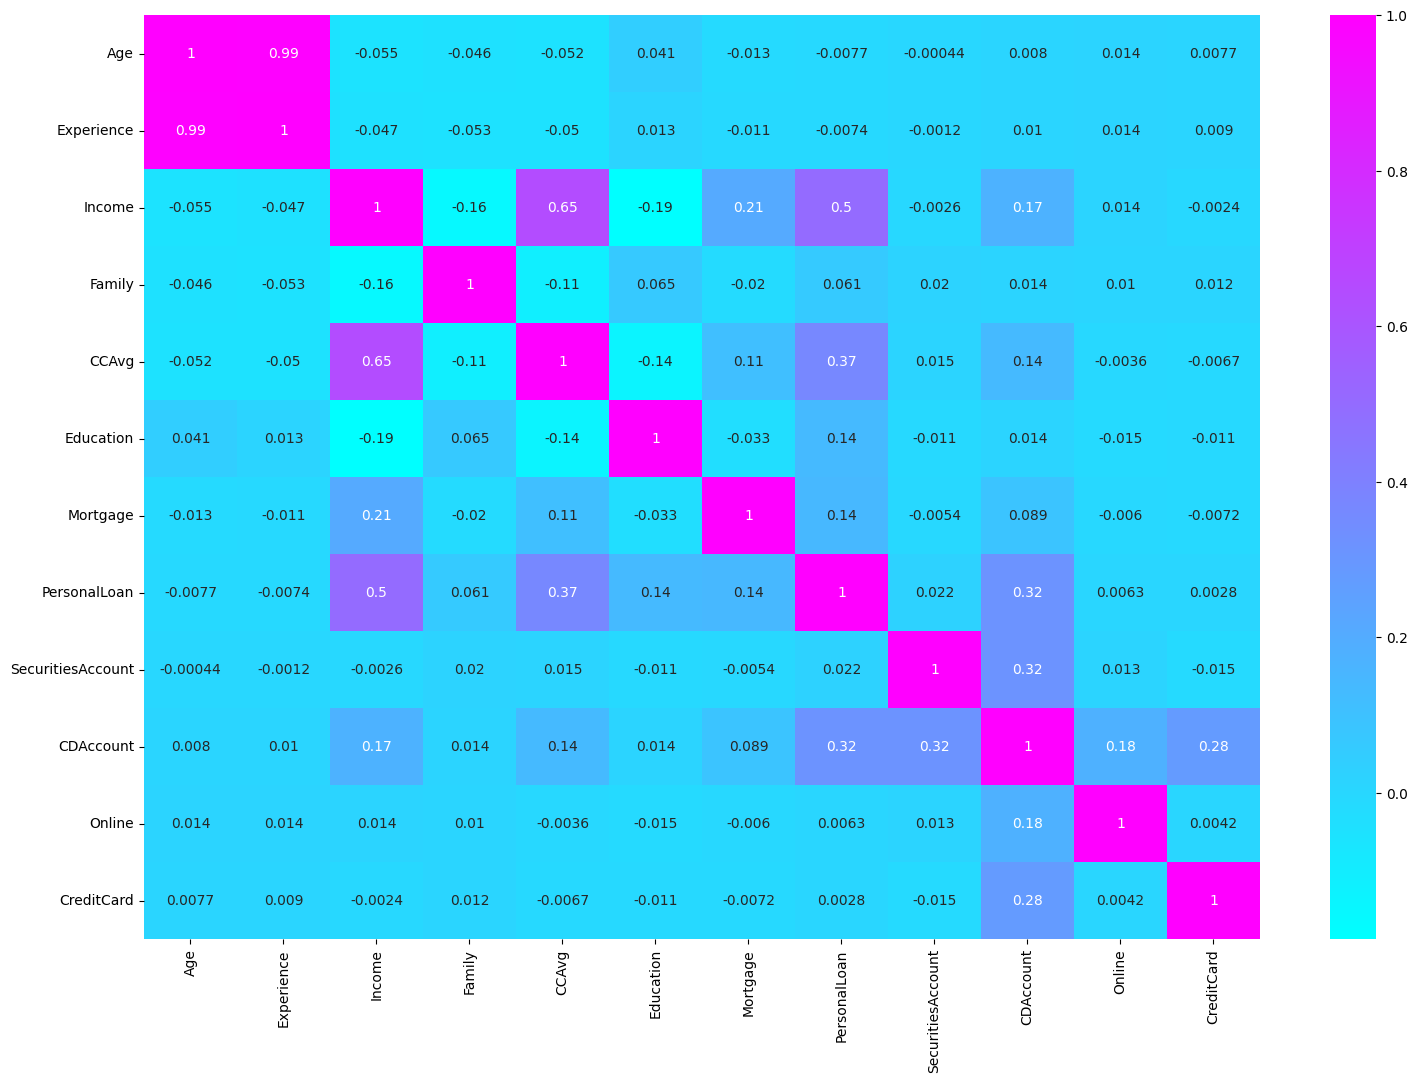

In [ ]:
#control the size of visualization

plt.figure(figsize=(18,12)) #normally not more than 18, height is up to you

sns.heatmap(df1.corr(), annot=True, cmap='cool')

In [ ]:
df1['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

In [ ]:
df2 = df.drop(['ID', 'ZIP Code'],axis=1)
df2.head()  #drop

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
df2.describe(include='all')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


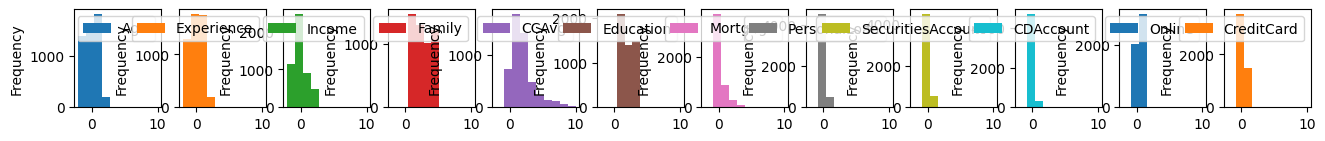

In [ ]:
plt.rcParams['figure.figsize'] = (20,15)

df1.plot(kind='hist', bins=10, subplots=True, layout=(10,15), sharex=False, sharey=False)

plt.show()

In [ ]:
X = df1
#because you already assigned the variable, if you state df.drop you need to write true #default is false
y = df1['CreditCard']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=41)

X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
4156,-0.727408,-0.706717,2.589966,1,8.6,1,-0.555468,0,0,0,0,0
3261,1.627962,1.734869,1.243128,1,3.8,1,-0.555468,0,0,0,0,0
2005,0.144951,0.252477,2.090332,2,6.5,2,-0.555468,1,0,1,1,1
2379,-0.291228,-0.183520,0.786940,2,6.1,1,1.233866,0,0,0,1,0
1765,-1.687003,-1.753111,1.634145,2,7.2,1,0.958584,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
321,-0.116757,-0.009121,0.591432,3,4.4,2,0.250715,1,0,0,0,0
4066,1.366254,1.473271,-0.277497,3,2.0,3,-0.555468,0,0,0,1,0
3980,0.057715,0.165278,0.330753,4,1.4,2,-0.555468,0,0,0,1,0
931,-1.599768,-1.491513,-0.668514,1,1.0,3,-0.555468,0,0,0,1,0


In [ ]:
A = df2.drop(['CreditCard'],axis=1)
#because you already assigned the variable, if you state df.drop you need to write true #default is false
b = df2['CreditCard']

In [ ]:
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, train_size=0.8, random_state=41)

A_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online
4156,37,12,193,1,8.6,1,0,0,0,0,0
3261,64,40,131,1,3.8,1,0,0,0,0,0
2005,47,23,170,2,6.5,2,0,1,0,1,1
2379,42,18,110,2,6.1,1,182,0,0,0,1
1765,26,0,149,2,7.2,1,154,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
321,44,20,101,3,4.4,2,82,1,0,0,0
4066,61,37,61,3,2.0,3,0,0,0,0,1
3980,46,22,89,4,1.4,2,0,0,0,0,1
931,27,3,43,1,1.0,3,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

A_train = scaler.fit_transform(A_train)

A_test = scaler.transform(A_test)

A_train[:5] #convert to an array

array([[-0.74456406, -0.72396843,  2.58653225, -1.21100546,  3.78108095,
        -1.04552969, -0.54734839, -0.32821699, -0.34750844, -0.25487787,
        -1.19773574],
       [ 1.61469302,  1.71980686,  1.23988345, -1.21100546,  1.05087174,
        -1.04552969, -0.54734839, -0.32821699, -0.34750844, -0.25487787,
        -1.19773574],
       [ 0.12923486,  0.23608615,  2.08696899, -0.33521051,  2.58661442,
         0.14561778, -0.54734839,  3.0467649 , -0.34750844,  3.9234478 ,
         0.83490871],
       [-0.3076646 , -0.2003023 ,  0.78376047, -0.33521051,  2.35909699,
        -1.04552969,  1.26109877, -0.32821699, -0.34750844, -0.25487787,
         0.83490871],
       [-1.70574286, -1.7713007 ,  1.630846  , -0.33521051,  2.98476993,
        -1.04552969,  0.98287613, -0.32821699, -0.34750844, -0.25487787,
        -1.19773574]])

In [ ]:
X = df1.iloc[:,:-1].values

y = df1['CreditCard'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape

(4000, 11)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


neigh = KNeighborsClassifier()

#training

neigh.fit(X_train, y_train) #default k neighbour is 5 #k cannot be float always integer

#prediction

y_hat = neigh.predict(X_test)

#Evaluation

print('The accuracy is:', (accuracy_score(y_test, y_hat))*100)

The accuracy is: 64.8


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


neigh = KNeighborsClassifier()

#training

neigh.fit(A_train, b_train) #default k neighbour is 5 #k cannot be float always integer

#prediction

b_hat = neigh.predict(A_test)

#Evaluation

print('The accuracy is:', (accuracy_score(b_test, b_hat))*100)

The accuracy is: 67.60000000000001


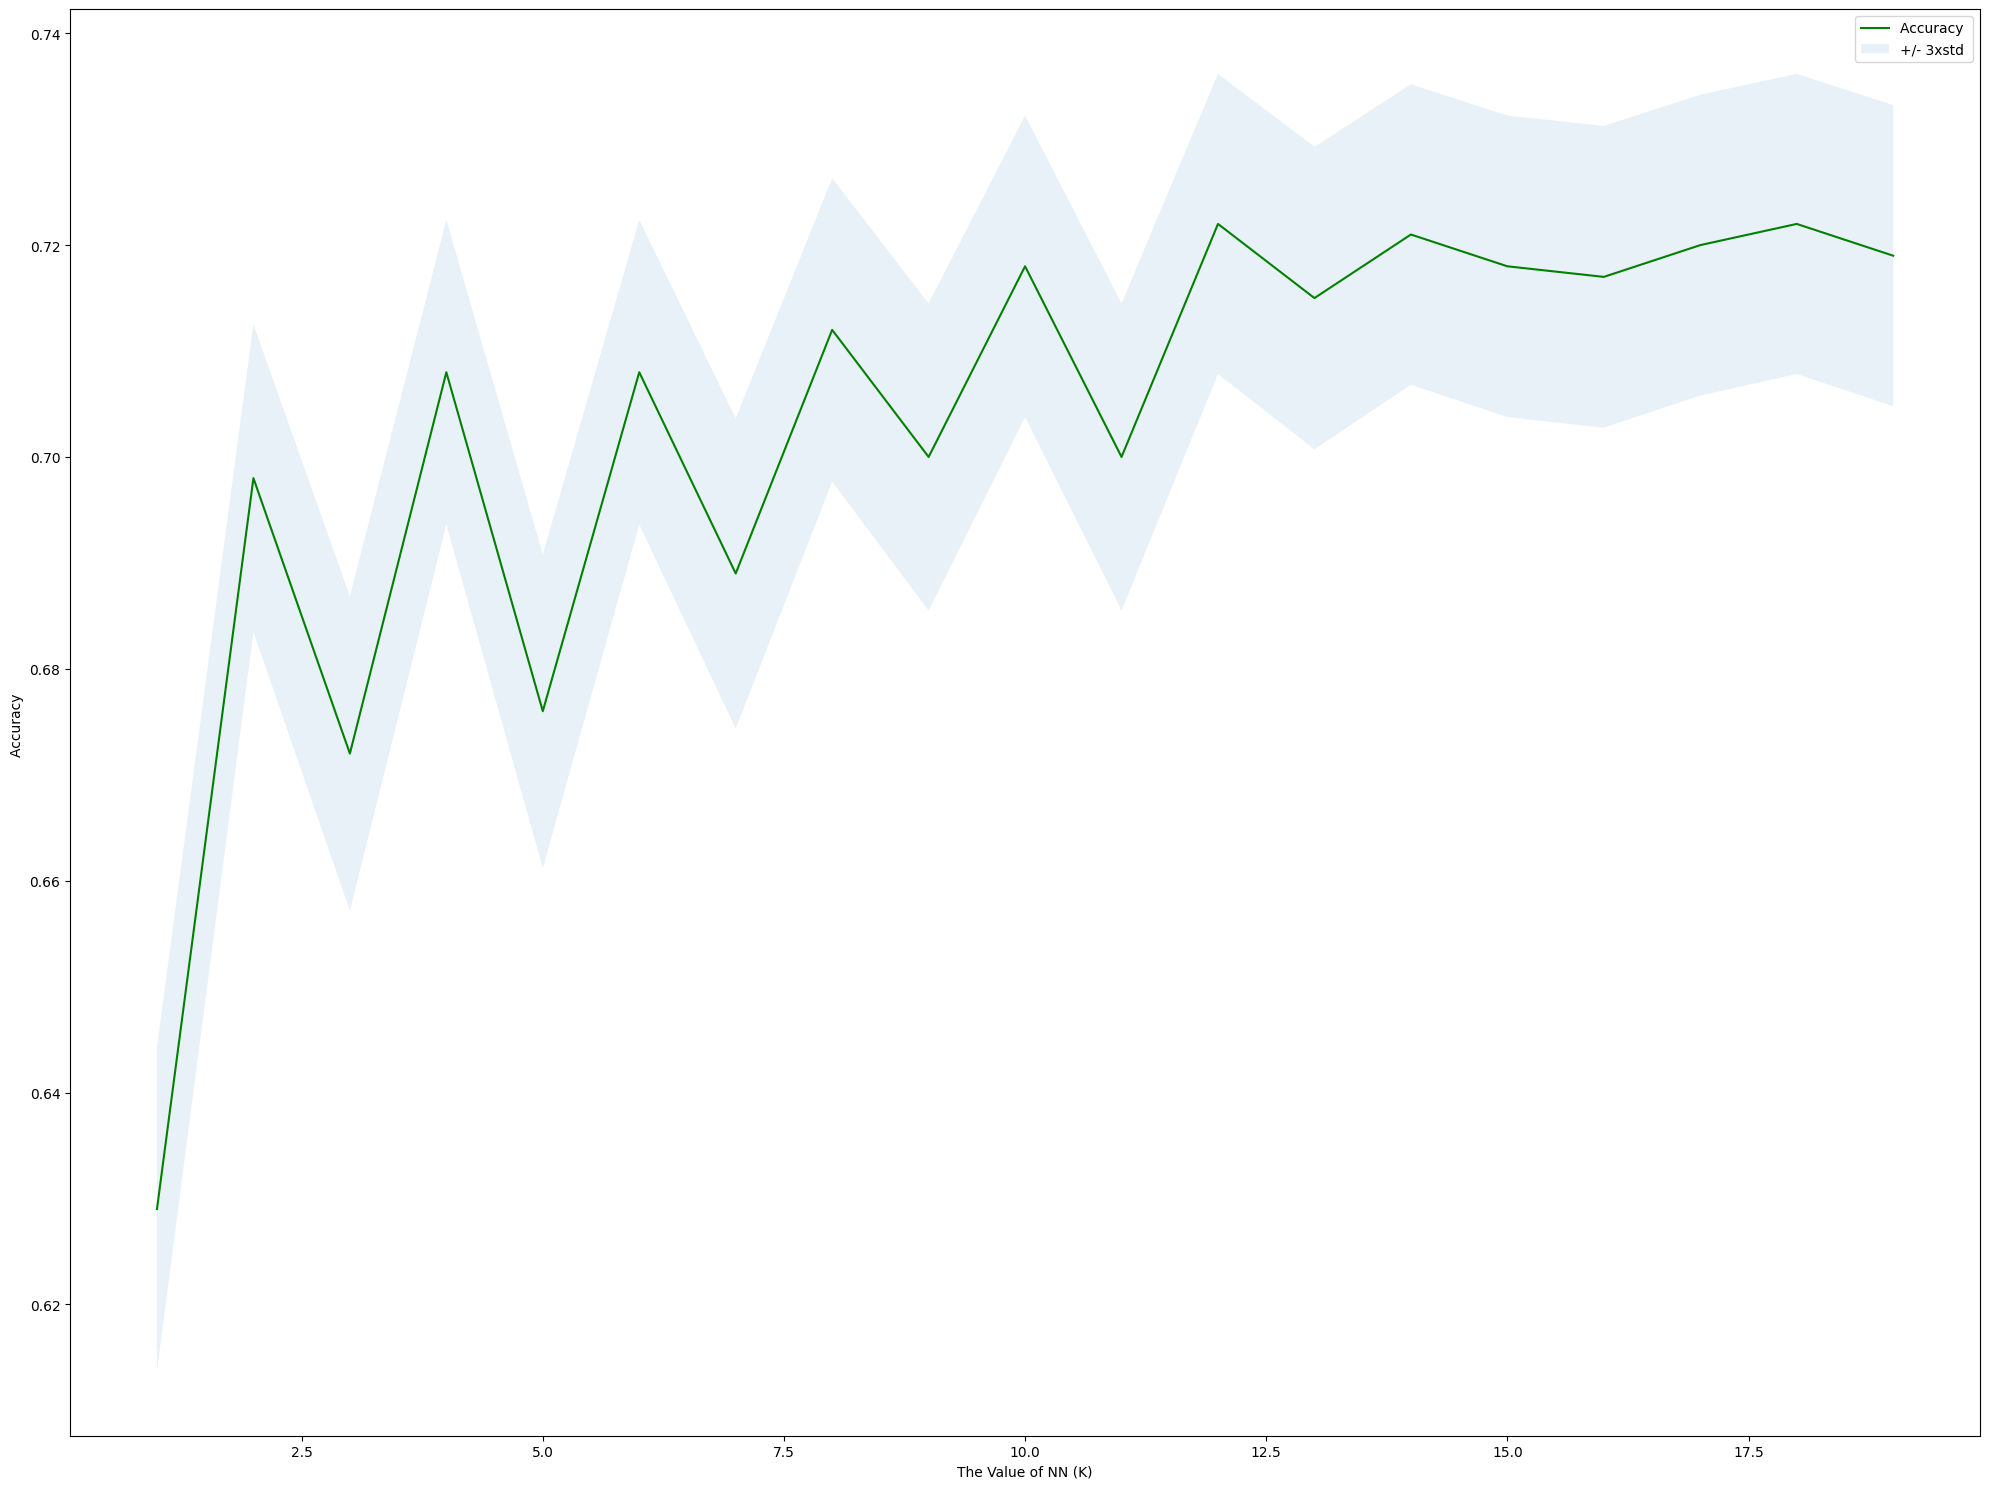



The best accuracy was with 0.722 with k= 12


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np


Ks =20 #range of k
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(A_train,b_train)
    bhat=neigh.predict(A_test)
    mean_acc[n-1] = metrics.accuracy_score(b_test, bhat)


    std_acc[n-1]=np.std(bhat==b_test)/np.sqrt(bhat.shape[0])

#print (mean_acc)

print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

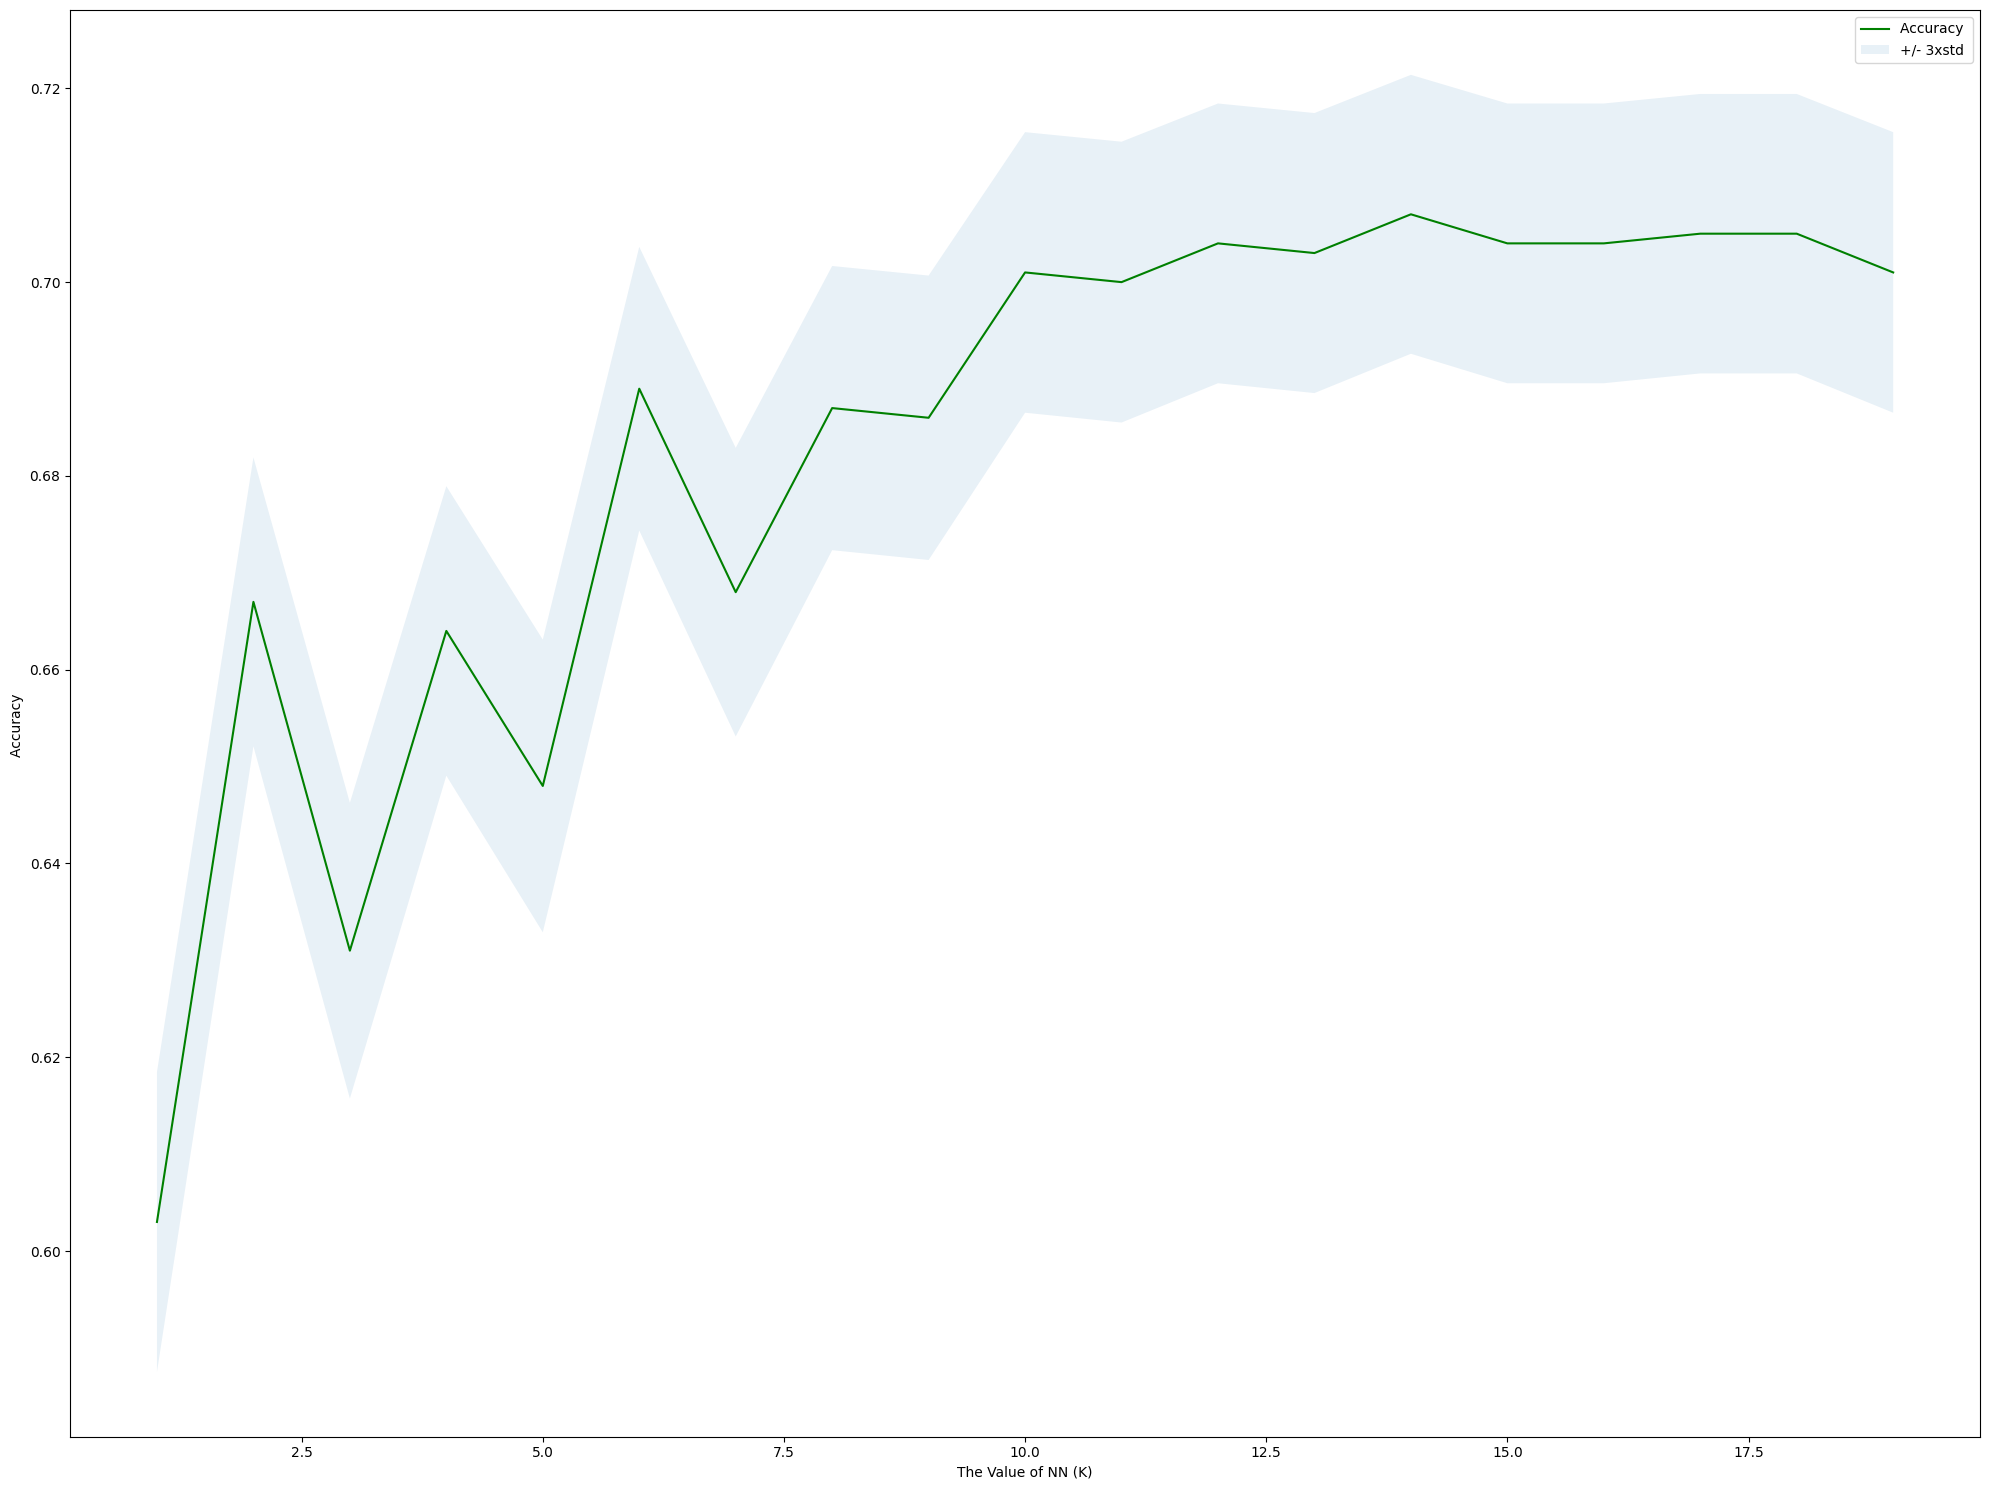



The best accuracy was with 0.707 with k= 14


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np


Ks =20 #range of k
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

#print (mean_acc)

print ('')
print ('')

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

print ('')
print ('')

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_hat)

print('The Confusion Matrix is=', cm)


print('')
print('TP is=', cm[0, 0])
print('TN is=', cm[1, 1])
print('FP is=', cm[0, 1])
print('FN is=', cm[1, 0])


The Confusion Matrix is= [[593 111]
 [241  55]]

TP is= 593
TN is= 55
FP is= 111
FN is= 241


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(b_test, b_hat)

print('The Confusion Matrix is=', cm)


print('')
print('TP is=', cm[0, 0])
print('TN is=', cm[1, 1])
print('FP is=', cm[0, 1])
print('FN is=', cm[1, 0])


The Confusion Matrix is= [[591 102]
 [222  85]]

TP is= 591
TN is= 85
FP is= 102
FN is= 222


In [ ]:
print ('The accuracy based in training set is:', neigh.score(X_train, y_train))
print ('The accuracy based in test set is:', neigh.score(X_test, y_test))

The accuracy based in training set is: 0.71525
The accuracy based in test set is: 0.701


In [ ]:
print ('The accuracy based in training set is:', neigh.score(A_train, b_train))
print ('The accuracy based in test set is:', neigh.score(A_test, b_test))

The accuracy based in training set is: 0.73475
The accuracy based in test set is: 0.718


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       704
           1       0.33      0.19      0.24       296

    accuracy                           0.65      1000
   macro avg       0.52      0.51      0.50      1000
weighted avg       0.60      0.65      0.61      1000



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(b_test, b_hat))

              precision    recall  f1-score   support

           0       0.73      0.85      0.78       693
           1       0.45      0.28      0.34       307

    accuracy                           0.68      1000
   macro avg       0.59      0.56      0.56      1000
weighted avg       0.64      0.68      0.65      1000



In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import jaccard_score


DS = DecisionTreeClassifier()


#training

DS.fit(A_train, b_train) #any algorithms you use will come with the parameters #Come with the default values

#prediction

b_hat = DS.predict(A_test)

#evaluation
print('')
print('The accuracy is :', accuracy_score(b_test, b_hat))
print('The CM is:', confusion_matrix(b_test, b_hat))
print('The Jaccard Score is:', jaccard_score(b_test, b_hat, average='micro'))


The accuracy is : 0.614
The CM is: [[501 192]
 [194 113]]
The Jaccard Score is: 0.443001443001443


In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import jaccard_score


DS = DecisionTreeClassifier()


#training

DS.fit(X_train, y_train) #any algorithms you use will come with the parameters #Come with the default values

#prediction

y_hat = DS.predict(X_test)

#evaluation

print('The accuracy is :', accuracy_score(y_test, y_hat))
print('')
print('The CM is:', confusion_matrix(y_test, y_hat))
print('')
print('The Jaccard Score is:', jaccard_score(y_test, y_hat, average='micro'))
print('')

The accuracy is : 0.637

The CM is: [[518 186]
 [177 119]]

The Jaccard Score is: 0.4673514306676449



In [ ]:
#modelling
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
#svm no support the number of data that close to the number of row
SVM_bank = SVC()

#training

SVM_bank.fit(X_train, y_train)

#prediction

y_hat = SVM_bank.predict(X_test)


#evaluation

print('The accuracy based on RBF kernel is:', (accuracy_score(y_test, y_hat))*100)

The accuracy based on RBF kernel is: 74.5


In [ ]:
#modelling
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
#svm no support the number of data that close to the number of row
SVM_bank = SVC()

#training

SVM_bank.fit(A_train, b_train)

#prediction

b_hat = SVM_bank.predict(A_test)


#evaluation

print('The accuracy based on RBF kernel is:', (accuracy_score(b_test, b_hat))*100)

The accuracy based on RBF kernel is: 72.7


In [ ]:
SVM_bank = SVC(kernel='linear')


#training
SVM_bank.fit(X_train,y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print('The Accuracy based on RBF kernal is :', (accuracy_score(y_test,y_hat))*100)

The Accuracy based on RBF kernal is : 74.7


In [ ]:
SVM_bank = SVC(kernel='linear')


#training
SVM_bank.fit(A_train,b_train)

#prediction
b_hat = SVM_bank.predict(A_test)

#evaluation
print('The Accuracy based on RBF kernal is :', (accuracy_score(b_test,b_hat))*100)

The Accuracy based on RBF kernal is : 72.5


In [ ]:
SVM_bank = SVC(kernel='poly')


#training
SVM_bank.fit(X_train,y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print('The Accuracy based on RBF kernal is :', (accuracy_score(y_test,y_hat))*100)

The Accuracy based on RBF kernal is : 74.2


In [ ]:
SVM_bank = SVC(kernel='poly')


#training
SVM_bank.fit(A_train,b_train)

#prediction
b_hat = SVM_bank.predict(A_test)

#evaluation
print('The Accuracy based on RBF kernal is :', (accuracy_score(b_test,b_hat))*100)

The Accuracy based on RBF kernal is : 72.7


In [ ]:
SVM_bank = SVC(kernel='sigmoid')


#training
SVM_bank.fit(X_train,y_train)

#prediction
y_hat = SVM_bank.predict(X_test)

#evaluation
print('The Accuracy based on RBF kernal is :', (accuracy_score(y_test,y_hat))*100)

The Accuracy based on RBF kernal is : 57.49999999999999


In [ ]:
SVM_bank = SVC(kernel='sigmoid')


#training
SVM_bank.fit(A_train,b_train)

#prediction
b_hat = SVM_bank.predict(A_test)

#evaluation
print('The Accuracy based on RBF kernal is :', (accuracy_score(b_test,b_hat))*100)

The Accuracy based on RBF kernal is : 64.8


In [ ]:
#cross validation

from sklearn.model_selection import cross_val_score

SVM_bank = SVC()

mean_accuracy = cross_val_score(SVM_bank, X, y, cv=5, scoring ='accuracy', verbose=2).mean() #cv is time to run
#verbose have 1 and 2 - show each step by the number of dot (0= false run behind, 1 = te see the result )
print('The total number of accuracy are :', mean_accuracy)
print('')
print('The average of all is:', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=   6.2s
[CV] END .................................................... total time=   3.9s
[CV] END .................................................... total time=   4.0s
[CV] END .................................................... total time=   6.2s
[CV] END .................................................... total time=   3.4s
The total number of accuracy are : 0.7415999999999999

The average of all is: 74.16


In [ ]:
SVM_bank = SVC(kernel='linear')

mean_accuracy = cross_val_score(SVM_bank, X, y, cv=5, scoring ='accuracy', verbose=2).mean() #cv is time to run
#verbose have 1 and 2 - show each step by the number of dot (0= false run behind, 1 = te see the result )
print('The total number of accuracy are :', mean_accuracy)
print('')
print('The average of all is:', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=   1.4s
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.1s
The total number of accuracy are : 0.7415999999999999

The average of all is: 74.16


In [ ]:
SVM_bank = SVC(kernel='poly')

mean_accuracy = cross_val_score(SVM_bank, X, y, cv=5, scoring ='accuracy', verbose=2).mean() #cv is time to run
#verbose have 1 and 2 - show each step by the number of dot (0= false run behind, 1 = te see the result )
print('The total number of accuracy are :', mean_accuracy)
print('')
print('The average of all is:', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=   8.1s
[CV] END .................................................... total time=   4.5s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   3.5s
[CV] END .................................................... total time=   3.2s
The total number of accuracy are : 0.7395999999999999

The average of all is: 73.96


In [ ]:
SVM_bank = SVC(kernel='sigmoid')

mean_accuracy = cross_val_score(SVM_bank, X, y, cv=5, scoring ='accuracy', verbose=2).mean() #cv is time to run
#verbose have 1 and 2 - show each step by the number of dot (0= false run behind, 1 = te see the result )
print('The total number of accuracy are :', mean_accuracy)
print('')
print('The average of all is:', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.3s
[CV] END .................................................... total time=   2.0s
The total number of accuracy are : 0.5892

The average of all is: 58.919999999999995
